In [13]:
from pathlib import Path

import pandas as pd
from matplotlib import pyplot as plt

# Get list of all CSV files in the directory
list_of_files = list(Path("../../logs/performance_filters_fainder").rglob("*.csv"))

# Load in all files in df
df_latest = pd.DataFrame()
for file in list_of_files:
    df_latest = pd.concat([df_latest, pd.read_csv(file)])


# "timestamp","percentile", "comparison","reference","fainder_mode","execution_time","filter_size_right","filter_size_wrong","filter_size","num_results","num_results_without_filter","query","num_workers",
print(df_latest)

              timestamp  percentile comparison reference    fainder_mode  \
0   2025-07-18 16:34:11         0.1         le         1  full_precision   
1   2025-07-18 16:34:16         0.1         le         1  full_precision   
2   2025-07-18 16:34:22         0.1         le         1  full_precision   
3   2025-07-18 16:34:27         0.1         le         1  full_precision   
4   2025-07-18 16:34:33         0.1         le         1  full_precision   
..                  ...         ...        ...       ...             ...   
18  2025-07-18 16:15:46         0.1         le         1  full_precision   
19  2025-07-18 16:15:51         0.1         le         1  full_precision   
20  2025-07-18 16:15:57         0.1         le         1  full_precision   
21  2025-07-18 16:16:03         0.1         le         1  full_precision   
22  2025-07-18 16:16:09         0.1         le         1  full_precision   

    execution_time filter_size_right filter_size_wrong filter_size  \
0         0.01828

/tmp/ipykernel_25659/1329748986.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_latest = pd.concat([df_latest, pd.read_csv(file)])
/tmp/ipykernel_25659/1329748986.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_latest = pd.concat([df_latest, pd.read_csv(file)])
/tmp/ipykernel_25659/1329748986.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determ

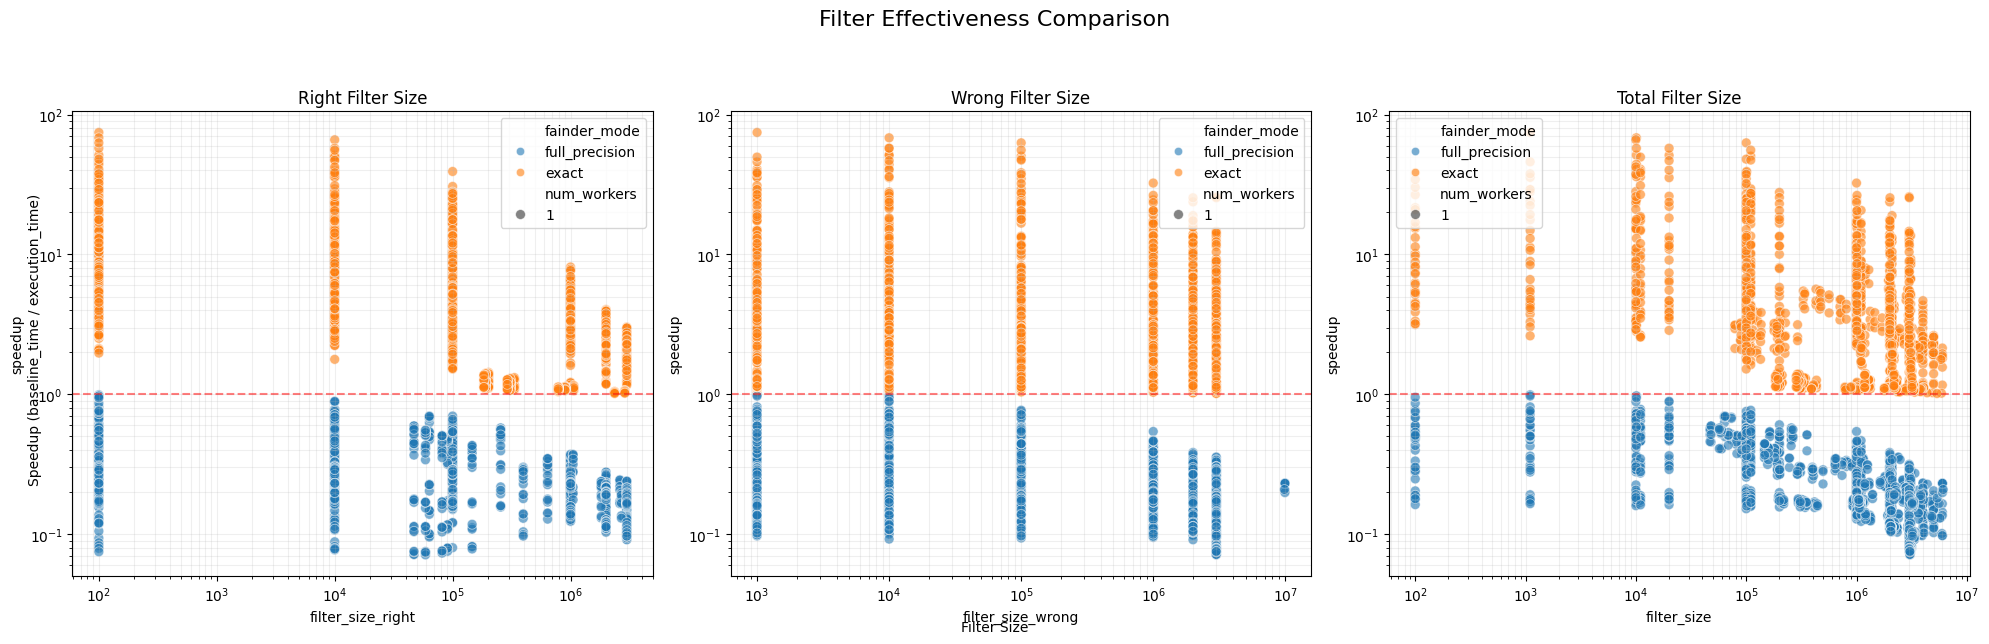


Summary Statistics for Speedup by Filter Type and Fainder Mode:

FILTER_SIZE_RIGHT:
                           speedup                               \
                             count   mean    std    min     max   
fainder_mode   num_workers                                        
exact          1              1260  6.512  8.936  1.014  74.464   
full_precision 1              1282  0.287  0.168  0.071   0.992   

                           filter_size_right           
                                         min      max  
fainder_mode   num_workers                             
exact          1                         100  3000000  
full_precision 1                         100  3000000  

FILTER_SIZE_WRONG:
                           speedup                               \
                             count   mean    std    min     max   
fainder_mode   num_workers                                        
exact          1              1080  6.356  8.839  1.014  74.464   
full_precis

In [14]:
import seaborn as sns
import numpy as np

# Calculate baseline times per query and fainder mode
baseline_times = df_latest[df_latest['filter_size'] == 0].groupby(['query', 'fainder_mode'])['execution_time'].first()
df_latest['baseline_time'] = df_latest.apply(
    lambda x: baseline_times.get((x['query'], x['fainder_mode'])), 
    axis=1
)
df_latest['speedup'] = df_latest['baseline_time'] / df_latest['execution_time']

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Filter Effectiveness Comparison', fontsize=16, y=1.05)

# Plot for filter_size_right
sns.scatterplot(
    data=df_latest[df_latest['filter_size_right'] > 0], 
    x='filter_size_right', 
    y='speedup',
    hue='fainder_mode',
    size='num_workers',
    sizes=(50, 200),
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title('Right Filter Size')
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].axhline(y=1, color='red', linestyle='--', alpha=0.5)
axes[0].grid(True, which="both", ls="-", alpha=0.2)

# Plot for filter_size_wrong
sns.scatterplot(
    data=df_latest[df_latest['filter_size_wrong'] > 0],
    x='filter_size_wrong',
    y='speedup',
    hue='fainder_mode',
    size='num_workers',
    sizes=(50, 200),
    alpha=0.6,
    ax=axes[1]
)
axes[1].set_title('Wrong Filter Size')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].axhline(y=1, color='red', linestyle='--', alpha=0.5)
axes[1].grid(True, which="both", ls="-", alpha=0.2)

# Plot for total filter_size
sns.scatterplot(
    data=df_latest[df_latest['filter_size'] > 0],
    x='filter_size',
    y='speedup',
    hue='fainder_mode',
    size='num_workers',
    sizes=(50, 200),
    alpha=0.6,
    ax=axes[2]
)
axes[2].set_title('Total Filter Size')
axes[2].set_xscale('log')
axes[2].set_yscale('log')
axes[2].axhline(y=1, color='red', linestyle='--', alpha=0.5)
axes[2].grid(True, which="both", ls="-", alpha=0.2)

# Set common labels
fig.text(0.5, 0.02, 'Filter Size', ha='center', va='center')
fig.text(0.02, 0.5, 'Speedup (baseline_time / execution_time)', ha='center', va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for Speedup by Filter Type and Fainder Mode:")
for filter_type in ['filter_size_right', 'filter_size_wrong', 'filter_size']:
    print(f"\n{filter_type.upper()}:")
    summary = df_latest[df_latest[filter_type] > 0].groupby(
        ['fainder_mode', 'num_workers']
    ).agg({
        'speedup': ['count', 'mean', 'std', 'min', 'max'],
        filter_type: ['min', 'max']
    }).round(3)
    print(summary)


/tmp/ipykernel_25659/1440459347.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = mode_data.groupby(['workers_label', 'filter_ratio_category'])['execution_time'].agg(['mean', 'min', 'max']).reset_index()
/tmp/ipykernel_25659/1440459347.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = mode_data.groupby(['workers_label', 'filter_ratio_category'])['execution_time'].agg(['mean', 'min', 'max']).reset_index()


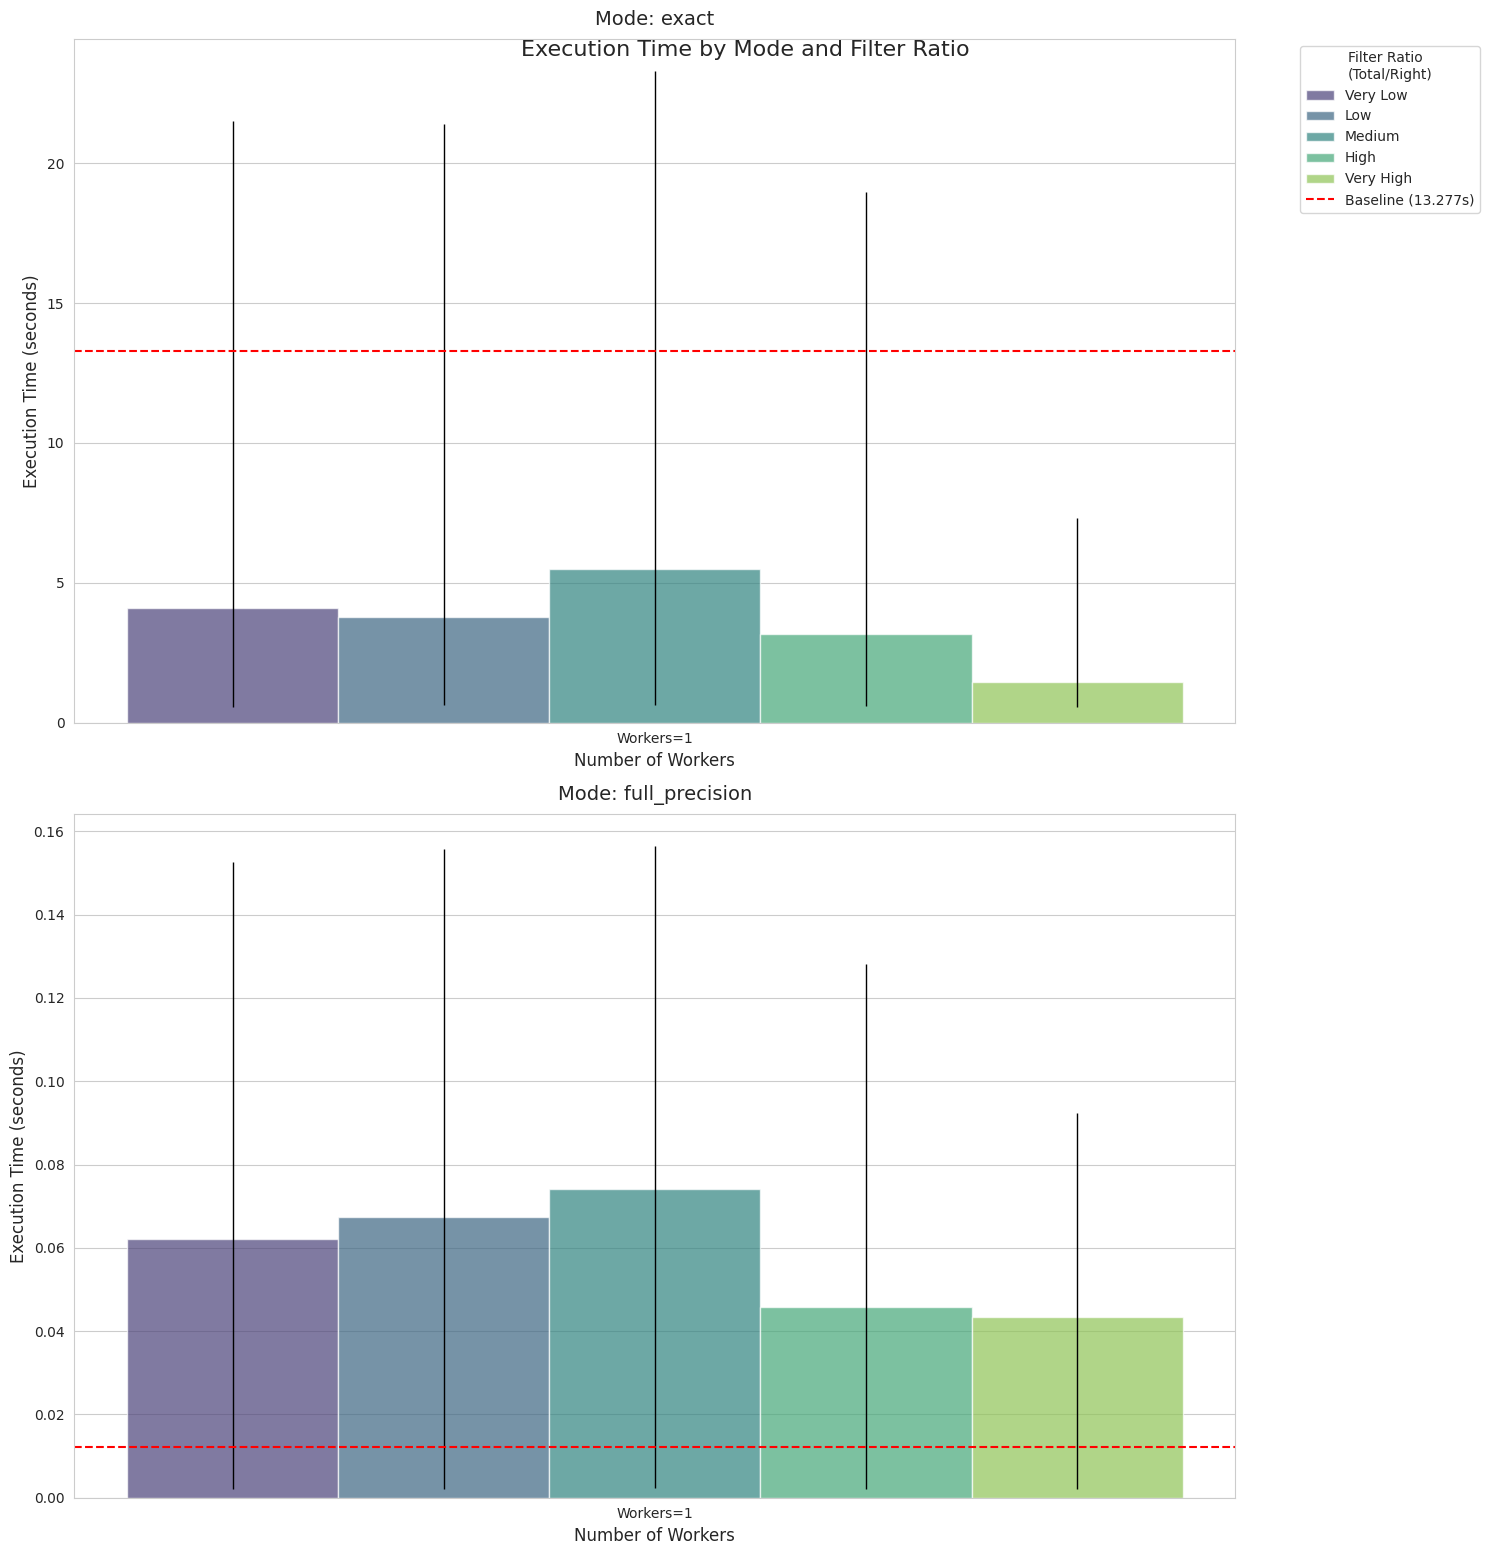


Summary Statistics by Mode and Filter Ratio Category:
                                     execution_time                       \
                                              count   mean    std    min   
fainder_mode   filter_ratio_category                                       
exact          Very Low                         258  4.114  4.477  0.569   
               Low                              300  3.769  4.183  0.637   
               Medium                           223  5.502  5.608  0.645   
               High                             257  3.181  3.051  0.606   
               Very High                        222  1.443  0.982  0.572   
full_precision Very Low                         252  0.062  0.046  0.002   
               Low                              262  0.067  0.048  0.002   
               Medium                           232  0.074  0.050  0.002   
               High                             262  0.046  0.033  0.002   
               Very High         

/tmp/ipykernel_25659/1440459347.py:94: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_sorted.groupby(['fainder_mode', 'filter_ratio_category']).agg({


In [15]:
import seaborn as sns

# Data preparation
baseline_times = df_latest[df_latest['filter_size'] == 0].groupby(
    ['fainder_mode', 'num_workers']
)['execution_time'].mean()

def get_baseline(row):
    return baseline_times.get((row['fainder_mode'], row['num_workers']))

# Calculate metrics
df_latest['baseline_time'] = df_latest.apply(get_baseline, axis=1)
df_latest['speedup'] = df_latest['baseline_time'] / df_latest['execution_time']

# Sort and filter data
df_sorted = df_latest.sort_values(['filter_size', 'fainder_mode', 'num_workers'])
df_sorted = df_sorted[df_sorted['filter_size_right'] != 0]

# Calculate filter ratio and create readable labels
df_sorted['filter_ratio'] = df_sorted['filter_size'] / df_sorted['filter_size_right']
df_sorted['filter_ratio_category'] = pd.qcut(df_sorted['filter_ratio'], 
                                           q=5, 
                                           labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Create more readable x-axis labels
df_sorted['workers_label'] = 'Workers=' + df_sorted['num_workers'].astype(str)
df_sorted['filter_size_readable'] = df_sorted['filter_size'].apply(lambda x: f'{x:,}')

# Set up the plot with seaborn style
sns.set_style("whitegrid")
unique_modes = df_sorted['fainder_mode'].unique()
fig, axes = plt.subplots(len(unique_modes), 1, figsize=(15, 8*len(unique_modes)))
fig.suptitle('Execution Time by Mode and Filter Ratio', y=0.95, fontsize=16)

# Create color palette
palette = sns.color_palette("viridis", n_colors=len(df_sorted['filter_ratio_category'].unique()))

# Plot each mode in a separate subplot
for idx, mode in enumerate(unique_modes):
    mode_data = df_sorted[df_sorted['fainder_mode'] == mode]
    
    # Calculate statistics for each group
    stats = mode_data.groupby(['workers_label', 'filter_ratio_category'])['execution_time'].agg(['mean', 'min', 'max']).reset_index()
    
    # Plot bars with min/max error bars
    bar_plot = sns.barplot(
        data=stats,
        x='workers_label',
        y='mean',
        hue='filter_ratio_category',
        palette=palette,
        alpha=0.7,
        ax=axes[idx]
    )
    
    # Add error bars for min/max
    n_workers = len(stats['workers_label'].unique())
    n_categories = len(stats['filter_ratio_category'].unique())
    bar_width = 0.8 / n_categories  # Seaborn's default total width is 0.8
    
    # Iterate through the DataFrame directly
    for i, worker in enumerate(stats['workers_label'].unique()):
        worker_data = stats[stats['workers_label'] == worker]
        for j, (_, row) in enumerate(worker_data.iterrows()):
            # Calculate the center of each bar
            bar_center = i - 0.4 + (j + 0.5) * bar_width
            axes[idx].vlines(bar_center, row['min'], row['max'],
                           color='black', linewidth=1)
    
    # Add baseline line
    baseline = baseline_times.get((mode, 1))
    axes[idx].axhline(y=baseline, color='red', linestyle='--', 
                     label=f'Baseline ({baseline:.3f}s)')
    
    # Customize subplot
    axes[idx].set_title(f'Mode: {mode}', pad=10, fontsize=14)
    axes[idx].set_xlabel('Number of Workers', fontsize=12)
    axes[idx].set_ylabel('Execution Time (seconds)', fontsize=12)
    axes[idx].tick_params(axis='x', rotation=0)
    
    # Add legend only to the first subplot
    if idx == 0:
        axes[idx].legend(title='Filter Ratio\n(Total/Right)', 
                        bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        axes[idx].get_legend().remove()

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Print summary statistics by mode and filter ratio category
print("\nSummary Statistics by Mode and Filter Ratio Category:")
summary = df_sorted.groupby(['fainder_mode', 'filter_ratio_category']).agg({
    'execution_time': ['count', 'mean', 'std', 'min', 'max'],
    'filter_ratio': ['min', 'max']
}).round(3)
print(summary)

